<b><pre>
Monte Carlo First Visit Method
MC methods learn directly from episodes of experience
MC is model-free : no knowledge of MDP transitions / rewards
MC uses the simplest possible idea: value = mean return
Episode must terminate before calculating return
Average return is calculated instead of using true return G
First Visit MC: The first time-step t that state s is visited in an episode
</pre></b>

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
np.random.seed(42)

<b><pre>
parameters
grid: 6 X 6
episods: 10000
</pre></b>

In [17]:
grid_rows = 3
grid_cols = 3
rewardSize = -1
terminationStates = [[0,0], [grid_rows-1, grid_cols-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
episods_count = 10

<b><pre>
instialize the states
</pre></b>

In [18]:
# initialization
states = [[i, j] for i in range(grid_rows) for j in range(grid_cols)]

<b><pre>
generate_episode
Generate n simulations starting from random points of the grid
move randomly to the four directions to reach a termination state
</pre></b>

In [19]:
# utils
def generate_episode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState) + np.array(action)
        if -1 in list(finalState) or grid_rows in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

<b><pre>
training

iterate from the end of the episodes/experience array
compute G as the previous state value in the same experience (weighed by gamma - the discount factor) 
    plus the received reward in that state
store G in an array of Returns(St) 
compute the average of the Returns(St) and we set this as the state value at a particular iteration
compute delta - difference of V and new rewards
</pre></b>

In [20]:
def monte_carlo_training(gamma):
    V = np.zeros((grid_rows, grid_cols))
    returns = {(i, j):list() for i in range(grid_rows) for j in range(grid_cols)}
    deltas = {(i, j):list() for i in range(grid_rows) for j in range(grid_cols)}
    
    for it in tqdm(range(episods_count), desc='Training progress'):
        episode = generate_episode()
        G = 0

        for i, step in enumerate(episode[::-1]):
            G = gamma * G + step[2]
            if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
                idx = (step[0][0], step[0][1])
                returns[idx].append(G)
                newValue = np.average(returns[idx])
                deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]] - newValue))
                V[idx[0], idx[1]] = newValue
                
    return V, deltas, returns

Training progress: 100%|█████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2500.18it/s]


Text(0.5, 1.0, 'Discounting factor: 1.0')

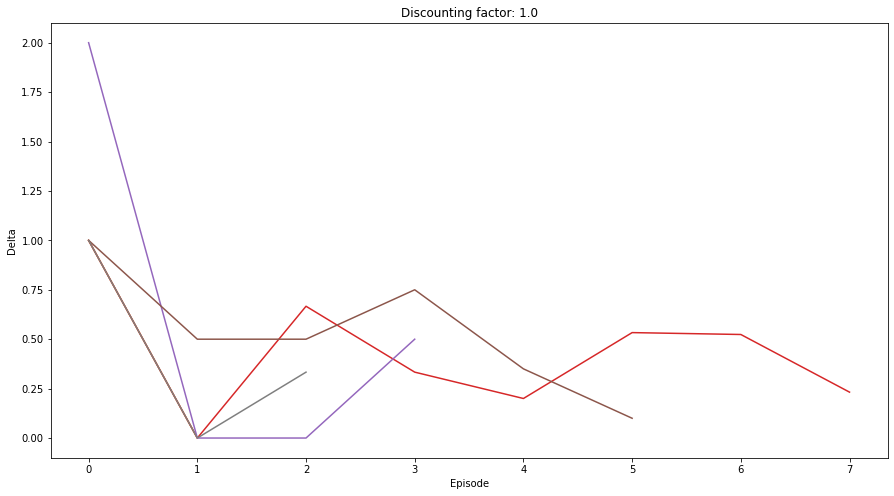

In [21]:
gamma = 1.0 # discounting factor
V, deltas, returns = monte_carlo_training(gamma)
plt.figure(figsize=(15,8))
all_series = [list(x)[:150] for x in deltas.values()]
for series in all_series:
    plt.plot(series)
    
plt.xlabel("Episode")
plt.ylabel("Delta")
plt.title("Discounting factor: " + str(gamma))

Training progress: 100%|█████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1110.34it/s]


Text(0.5, 1.0, 'Discounting factor: 1.0')

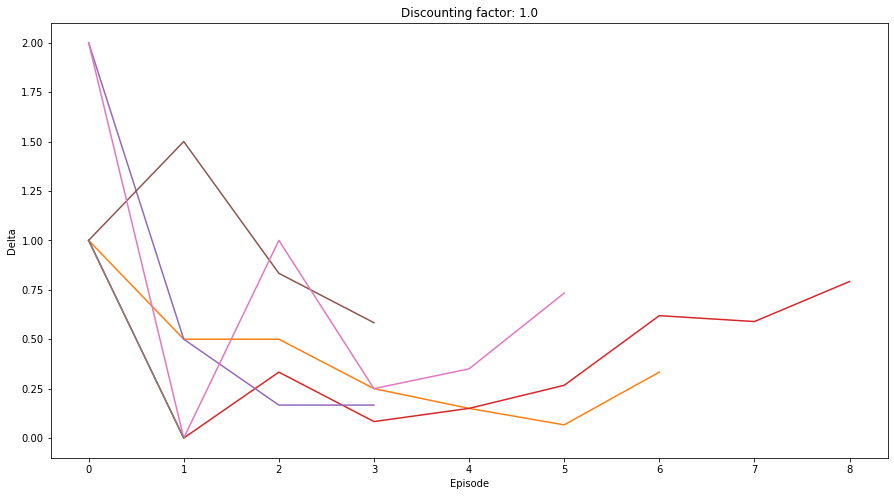

In [22]:
gamma = 1.0 # discounting rate
V, deltas, returns = monte_carlo_training(gamma)
plt.figure(figsize=(15,8))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)
    
plt.xlabel("Episode")
plt.ylabel("Delta")
plt.title("Discounting factor: " + str(gamma))

In [26]:
V

array([[ 0.        , -2.        ,  0.        ],
       [-3.66666667, -2.5       , -2.75      ],
       [-4.33333333, -1.        ,  0.        ]])